In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

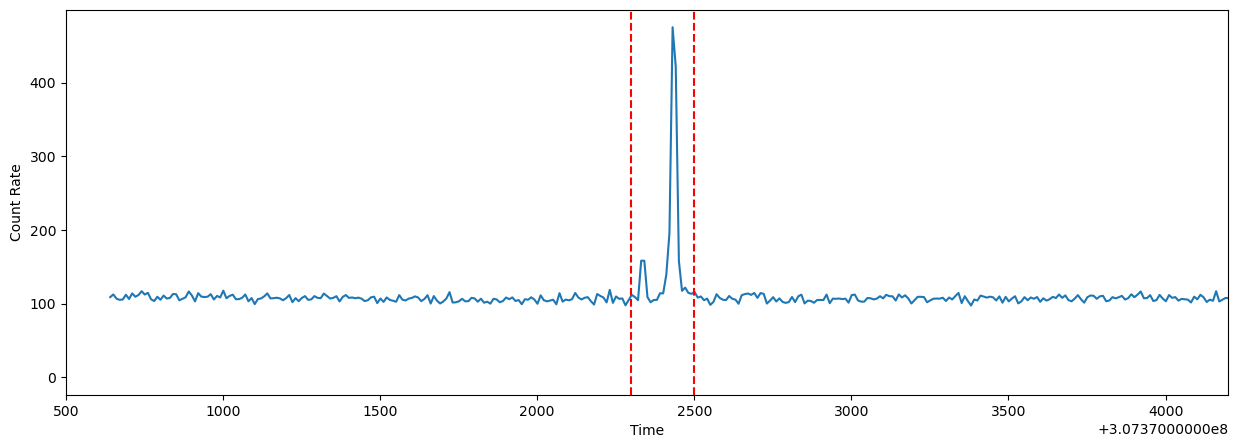

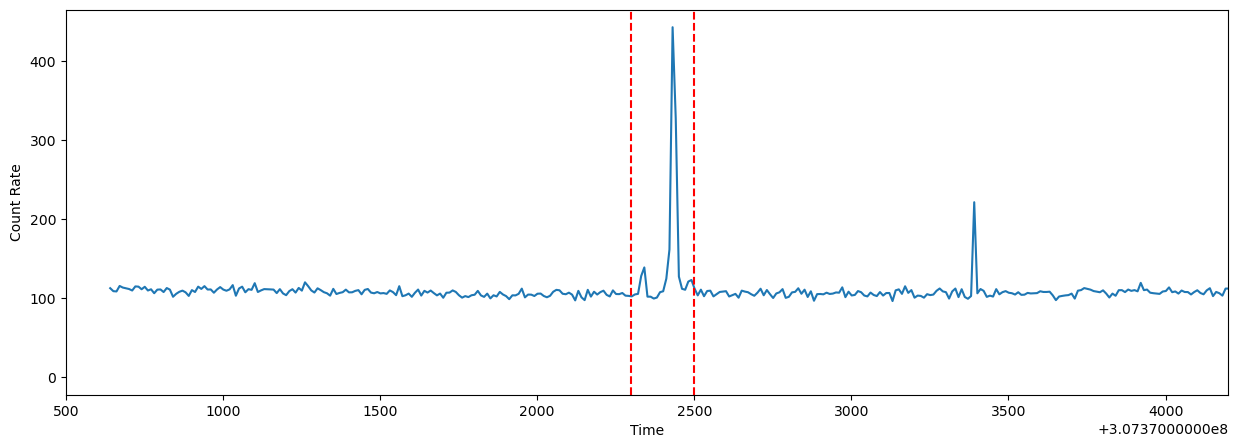

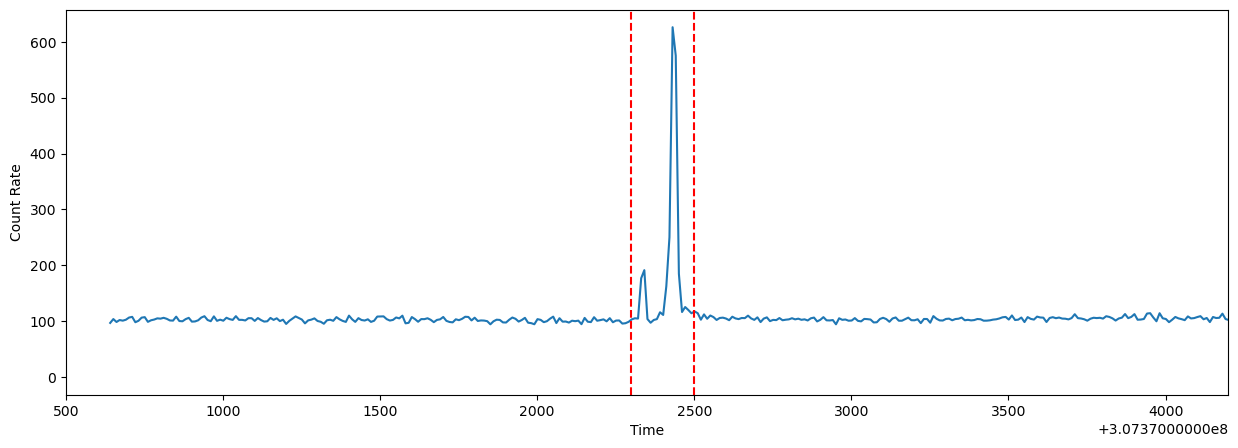

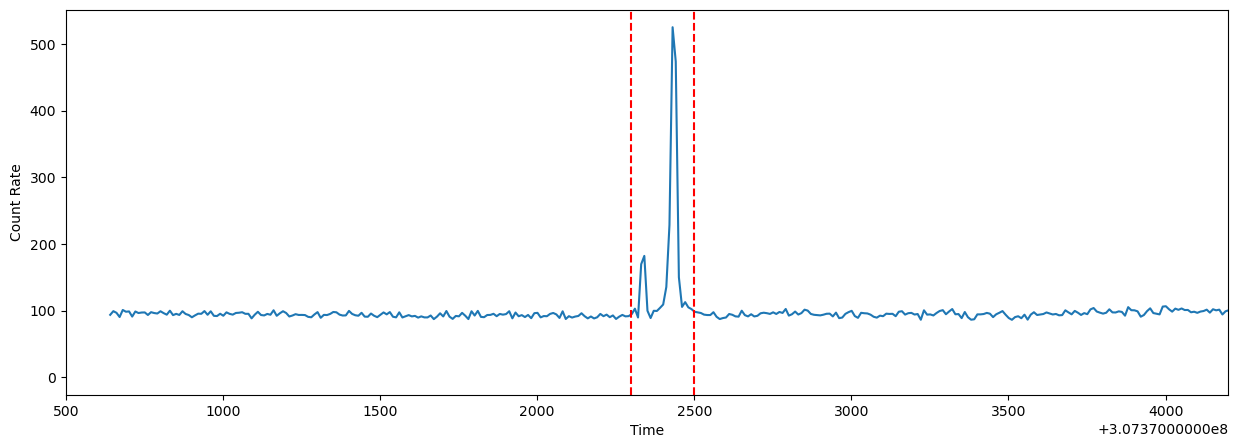

In [2]:
m1=fits.open('final_output2_Q0.lc')
m2=fits.open('final_output2_Q1.lc')
m3=fits.open('final_output2_Q2.lc')
m4=fits.open('final_output2_Q3.lc')
req1 = 2300 + 3.0737e8
req2 = 2500 + 3.0737e8
m_complete = [m1,m2,m3,m4]
a1 = m1
a2 = m2
a3 = m3
a4 = m4
for m in m_complete:
    plt.subplots(1, 1, figsize = (15,5))
    plt.xlim(500+3.0737e8,4200+3.0737e8)
    plt.plot(m[1].data['TIME'],m[1].data['RATE'])
    plt.axvline(x= req1, color='r', linestyle='--')
    plt.axvline(x= req2, color='r', linestyle='--')
    plt.xlabel("Time")
    plt.ylabel("Count Rate")


### Calculating mean of the background of the GRB.


In [3]:
x_ranges = [[750, 2300], [2500, 4200]]
for m in m_complete:
    x = m[1].data['TIME']
    y = m[1].data['RATE']
    c = 30737e4
    mean_values = []
    for x_range in x_ranges:
        indices = np.where((x - c >= x_range[0]) & (x - c <= x_range[1]))
        y_range = y[indices]
        mean = np.mean(y_range)
        mean_values.append(mean)
    indices_range = np.where((x - c >= 2300) & (x - c <= 2500))
    y[indices_range] -= (mean_values[0]+mean_values[1])/2
print((mean_values[0]+mean_values[1])/2)

94.52285766601562


## Using the median filter to detrend the lightcurve:
### Detrending pre-grb portion. 

c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


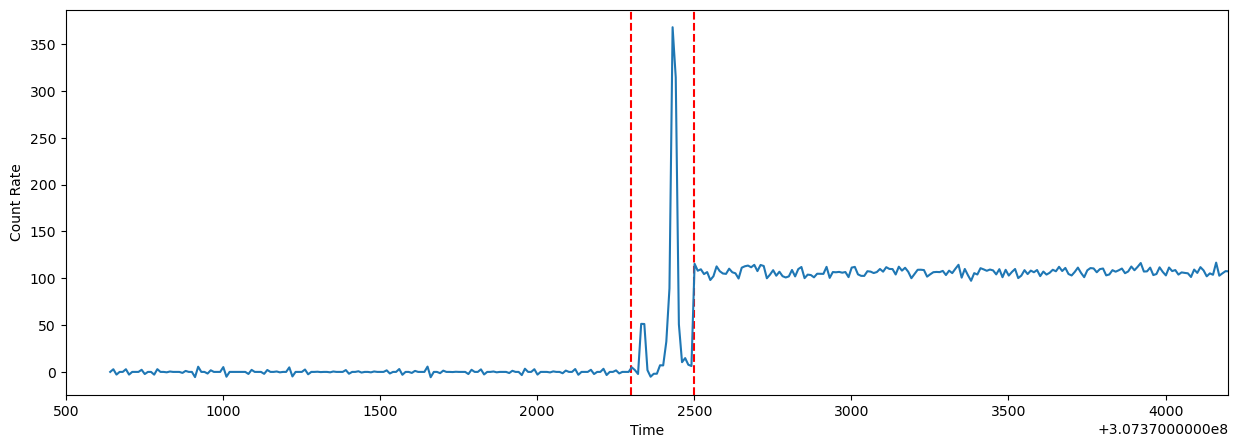

c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


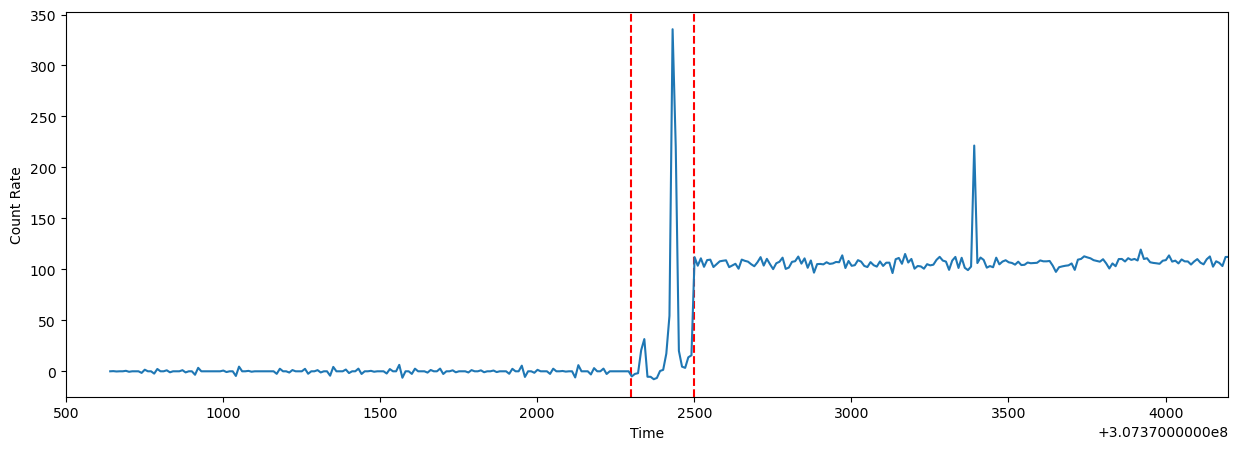

c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


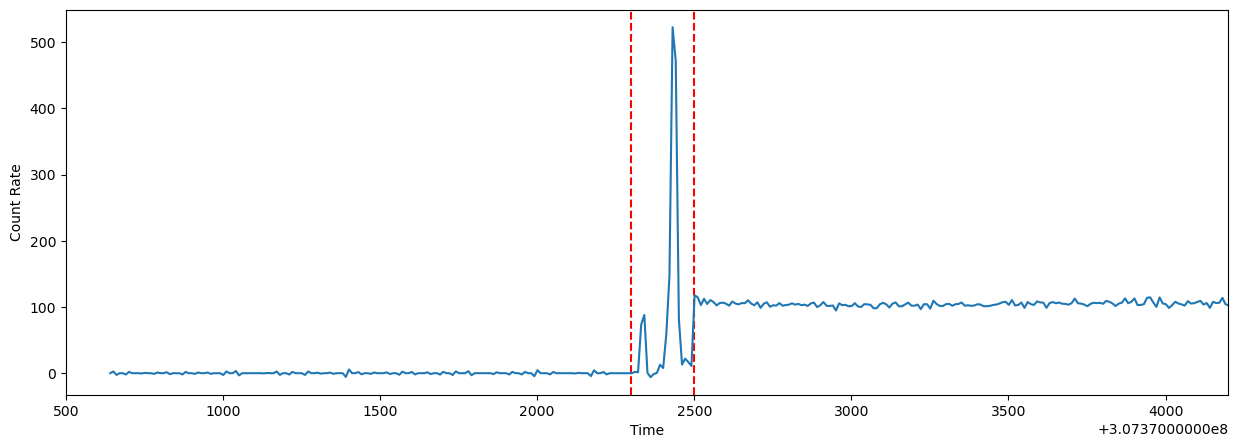

c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


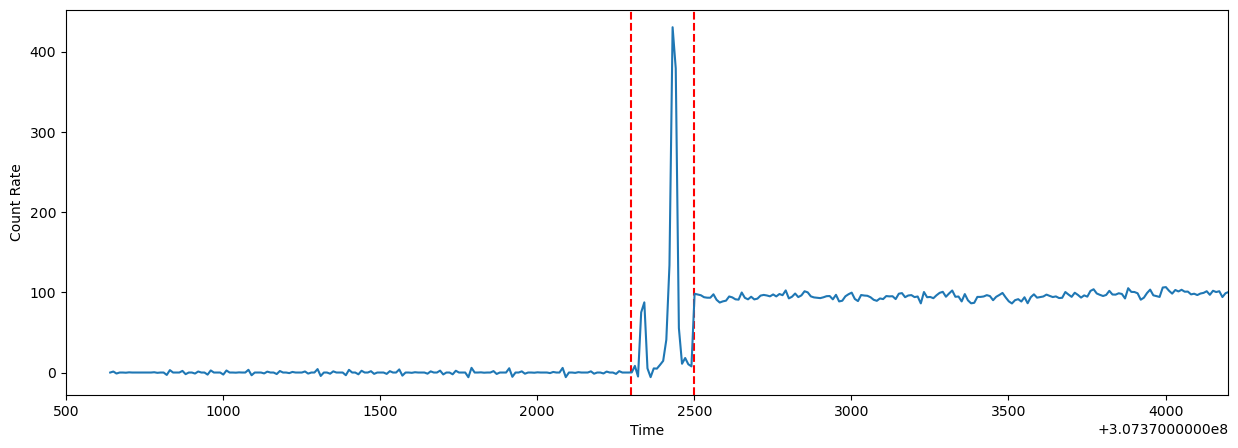

In [4]:
import numpy as np
import matplotlib.pyplot as plt

for m in m_complete:
    x = m[1].data['TIME']
    y = m[1].data['RATE']
    c = 30737e4
    intervals = np.arange(0, 2310, 13)
    median_values = []
    for i in range(len(intervals) - 1):
        indices = np.where((x - c >= intervals[i]) & (x - c < intervals[i + 1]))
        y_interval = y[indices]
        median = np.median(y_interval)
        median_values.append(median)
        y[indices] -= median
    plt.subplots(1, 1, figsize=(15, 5))
    plt.xlim(500 + 3.0737e8, 4200 + 3.0737e8)
    plt.axvline(x=req1, color='r', linestyle='--')
    plt.axvline(x=req2, color='r', linestyle='--')
    plt.xlabel("Time")
    plt.ylabel("Count Rate")
    plt.plot(x, y)
    plt.show()


### Detrending post-grb portion.


c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yashs\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\yashs\a

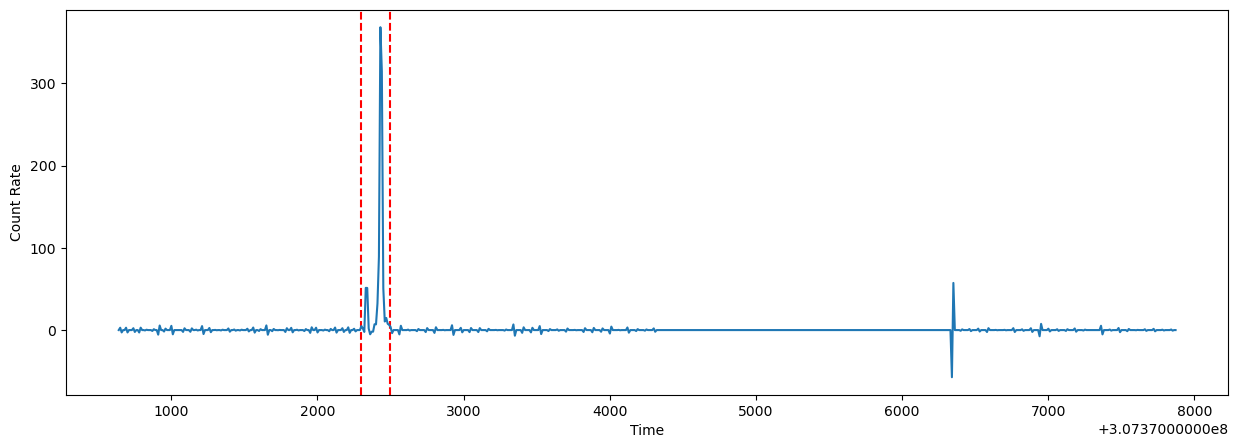

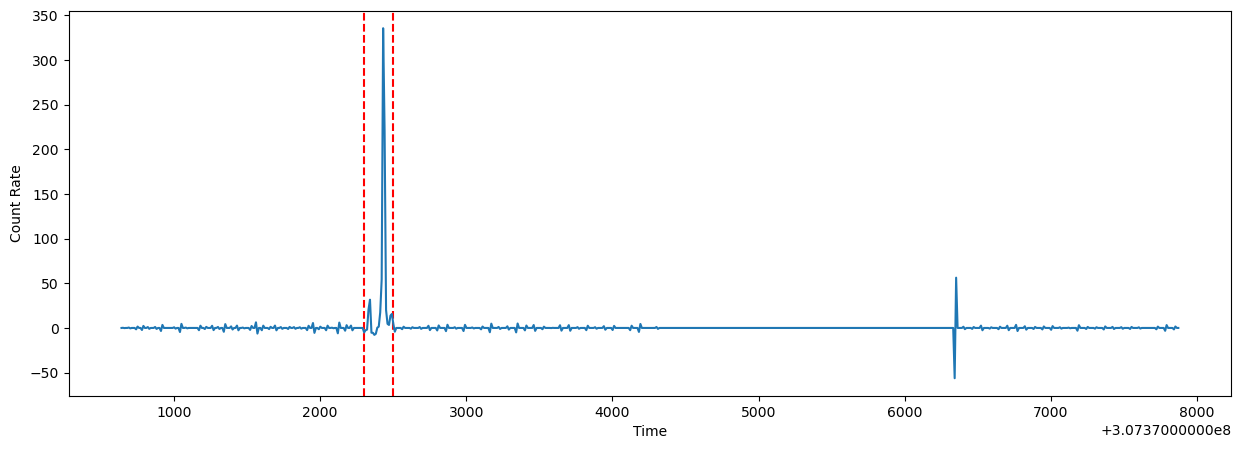

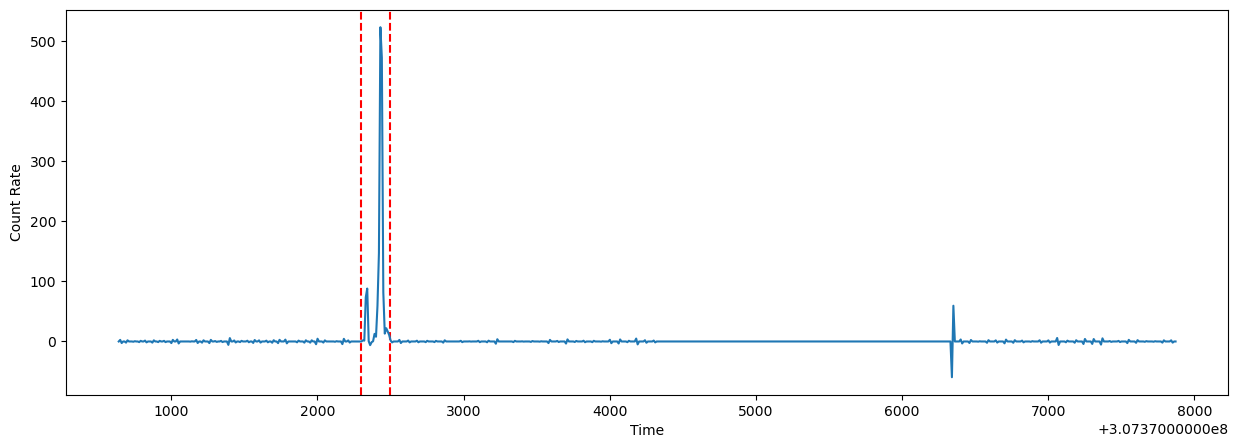

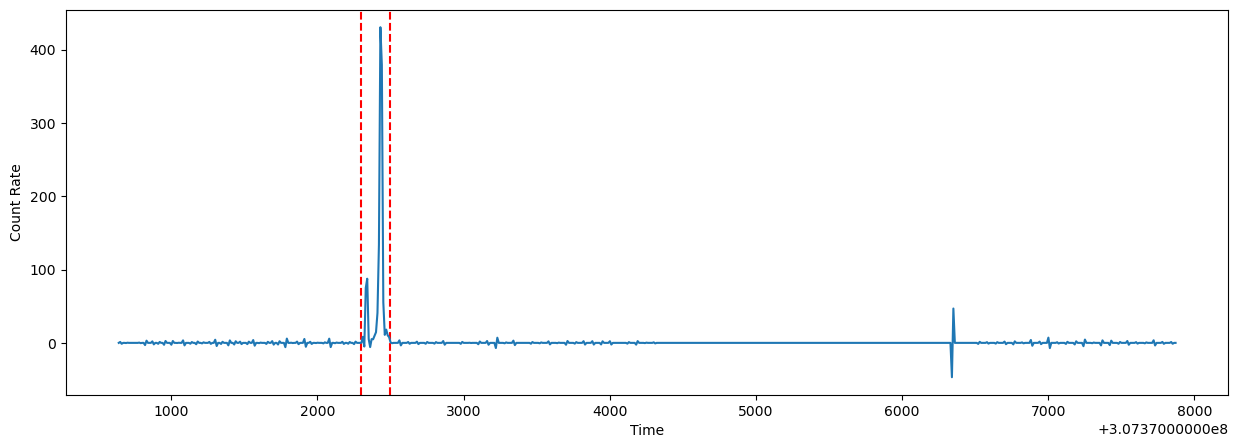

In [5]:

for m in m_complete:
    x = m[1].data['TIME']
    y = m[1].data['RATE']
    c = 30737e4
    intervals = np.arange(2500, 7900, 12)

    median_values = []
    for i in range(len(intervals) - 1):
        indices = np.where((x - c >= intervals[i]) & (x - c < intervals[i + 1]))
        y_interval = y[indices]
        median = np.median(y_interval)
        median_values.append(median)
        y[indices] -= median
    plt.subplots(1, 1, figsize = (15,5))
    #plt.xlim(500+3.0737e8,4100+3.0737e8)
    plt.axvline(x= req1, color='r', linestyle='--')
    plt.axvline(x= req2, color='r', linestyle='--')
    plt.xlabel("Time")
    plt.ylabel("Count Rate")
    plt.plot(x,y)


#### Calculating SNR using the traditional method:

In [6]:
count = -1
for m in m_complete:
    x = m[1].data['TIME']
    y = m[1].data['RATE']
    count += 1
    indices_range = np.where((x  >= 2300 + c) & (x  <= 2500 + c))
    y_range = y[indices_range]
    mean = np.mean(y_range)
    indices_range1 = np.where((x  <= 2300 + c) &(x>=600 +c))
    indices_range2 = np.where((x  >= 2500 + c)&(x<=6000 +c))
    add = np.concatenate([y[indices_range2],y[indices_range1]])
    print("The SNR for quad",count,"is",20*np.log10((mean-np.mean(add))/np.std(add)),"dB")


The SNR for quad 0 is 31.07919216156006 dB
The SNR for quad 1 is 28.544366359710693 dB
The SNR for quad 2 is 37.04545259475708 dB
The SNR for quad 3 is 34.66523885726929 dB


### Calculating using Gaussian Modelling:


In [7]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)

[  7.18908526 106.80988458   3.96376145]
[ 40.87206924 107.14781506   4.14415103]
[  8.78521562 103.46420852   3.45953577]
[ 7.10666646 94.41773396  3.87918693]
[7.189085260227774, 40.87206924074796, 8.785215621452126, 7.106666463626081]


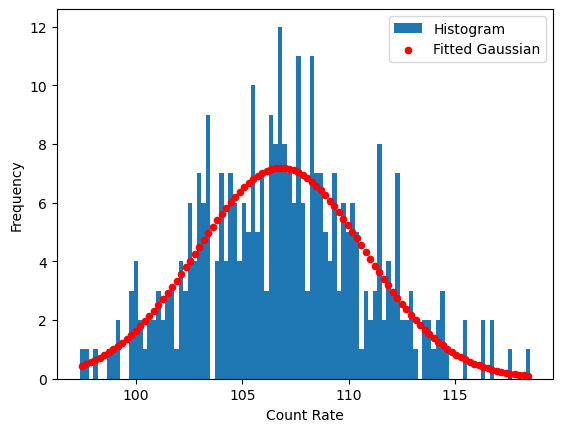

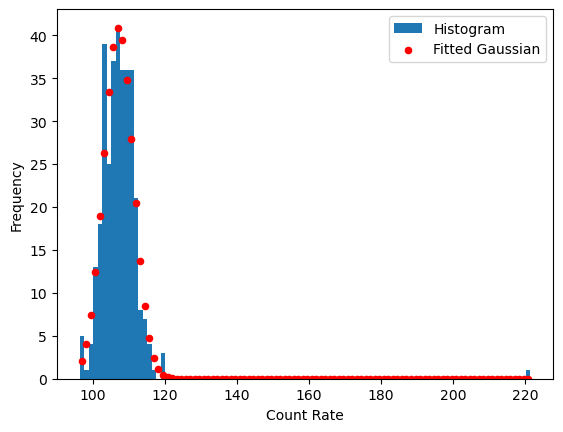

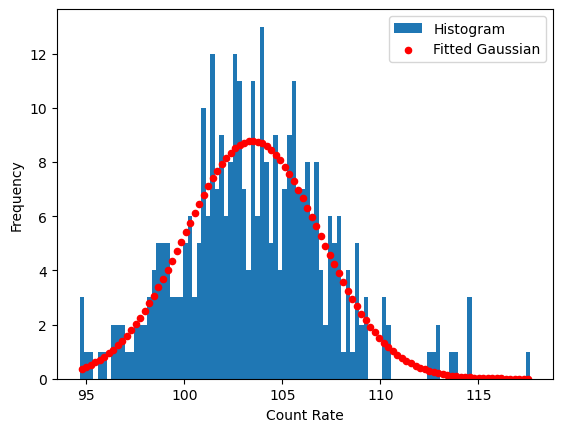

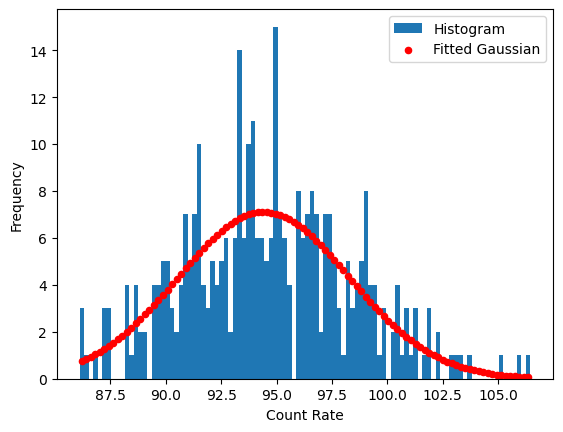

In [8]:
from scipy.optimize import curve_fit
a1=fits.open('final_output2_Q0.lc')
a2=fits.open('final_output2_Q1.lc')
a3=fits.open('final_output2_Q2.lc')
a4=fits.open('final_output2_Q3.lc')
a_complete=[a1,a2,a3,a4]
amp = []
mean = []
stddev = []

for a in a_complete:
    x = a[1].data['TIME']
    y = a[1].data['RATE']
    indices_range1 = np.where((x <= 2300 + c) & (x >= 600 + c))
    indices_range2 = np.where((x >= 2500 + c) & (x <= 4200 + c))
    add = np.concatenate([y[indices_range2], y[indices_range1]])
    hist, bins = np.histogram(add, bins=100, density=False)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    amplitude_guess = np.max(hist)
    mean_guess = np.mean(bin_centers)
    initial_guess = [100, 100, 10]
    popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
    amplitude_fit, mean_fit, stddev_fit = popt
    curve_x = np.linspace(min(bin_centers), max(bin_centers), 100)
    curve_y = gaussian(curve_x, amplitude_fit, mean_fit, stddev_fit)
    
    amp.append(amplitude_fit)
    mean.append(mean_fit)
    stddev.append(stddev_fit)
    
    plt.subplots(1, 1)
    plt.xlabel("Count Rate")
    plt.ylabel("Frequency")
    plt.hist(add, bins=100, label='Histogram', density=False)
    plt.scatter(curve_x, curve_y, color='red', label='Fitted Gaussian', s=20)
    plt.legend()
    print(popt)
print(amp)

In [9]:
def observations(data, mean, std):
    threshold = 3 * std                  #  3 sigma threshold
    lower_bound = mean - threshold
    upper_bound = mean + threshold
    observations_within_3sigma = np.where((data >= lower_bound) & (data <= upper_bound))
    observations_outside_3sigma = np.where((data < lower_bound) | (data > upper_bound))
    return observations_within_3sigma,observations_outside_3sigma

In [10]:
count = 0
for a in a_complete:
    x = a[1].data['TIME']
    y = a[1].data['RATE']
    maxi = np.max(y)
    indices_range1 = np.where((x  <= 2300 + c) &(x>=600 +c))
    indices_range2 = np.where((x  >= 2500 + c)&(x<=4200 +c))
    add = np.concatenate([y[indices_range2],y[indices_range1]])
    indices_range = np.where((x  >= 2300 + c) & (x  <= 2500 + c))
    y_range = y[indices_range]
    mean2 = np.mean(y_range)
    obs,out  = observations(add, mean[count], stddev[count])    
    count+=1
    arr = np.array(obs)
    arr2 = np.array(out)
    snr = maxi/(3* stddev[count-1])
    print("The SNR for quad",count-1,"is",snr)

The SNR for quad 0 is 39.950966083646705
The SNR for quad 1 is 35.623607131427896
The SNR for quad 2 is 60.31877718842632
The SNR for quad 3 is 45.11231033840448


### Using Savgol filtering:

The SNR for quad 0 is 122.48516
The SNR for quad 1 is 65.957214
The SNR for quad 2 is 104.411415
The SNR for quad 3 is 69.88389


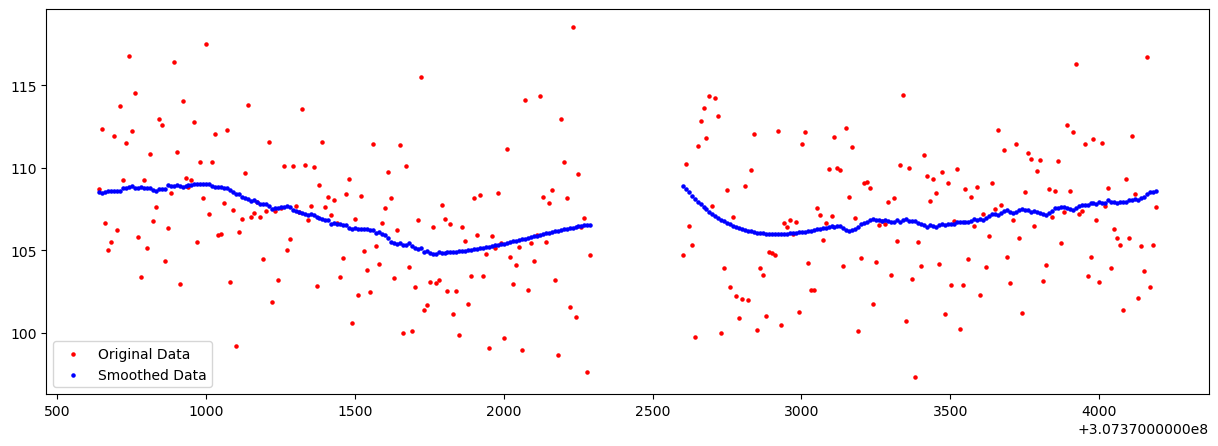

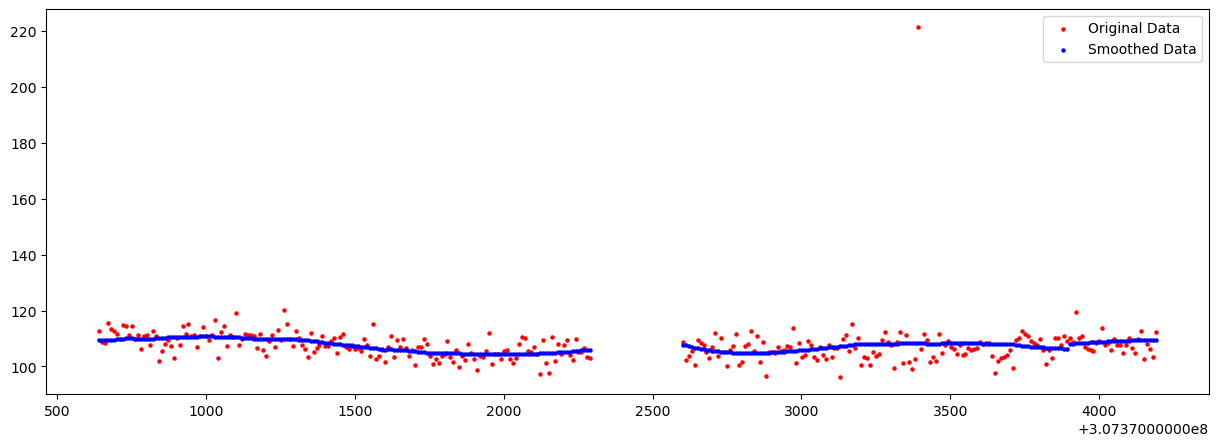

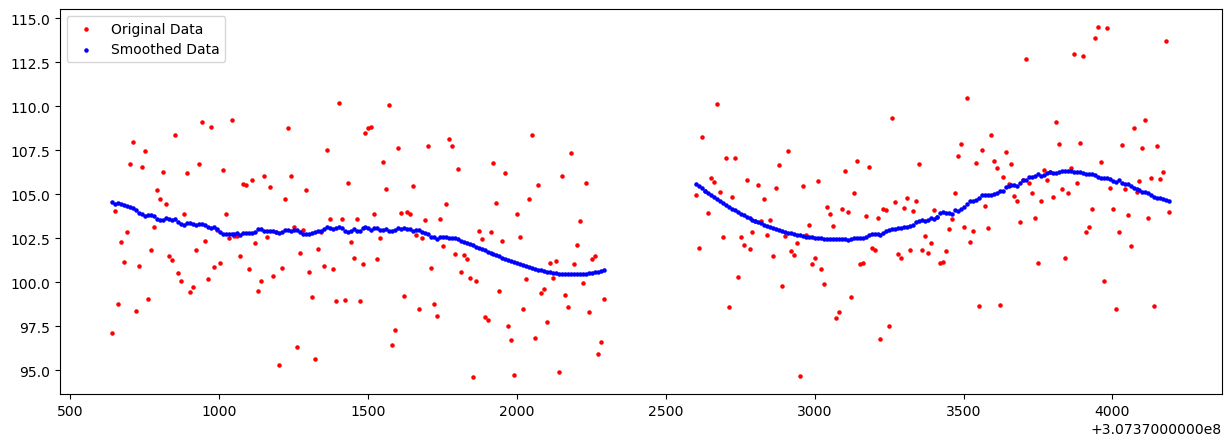

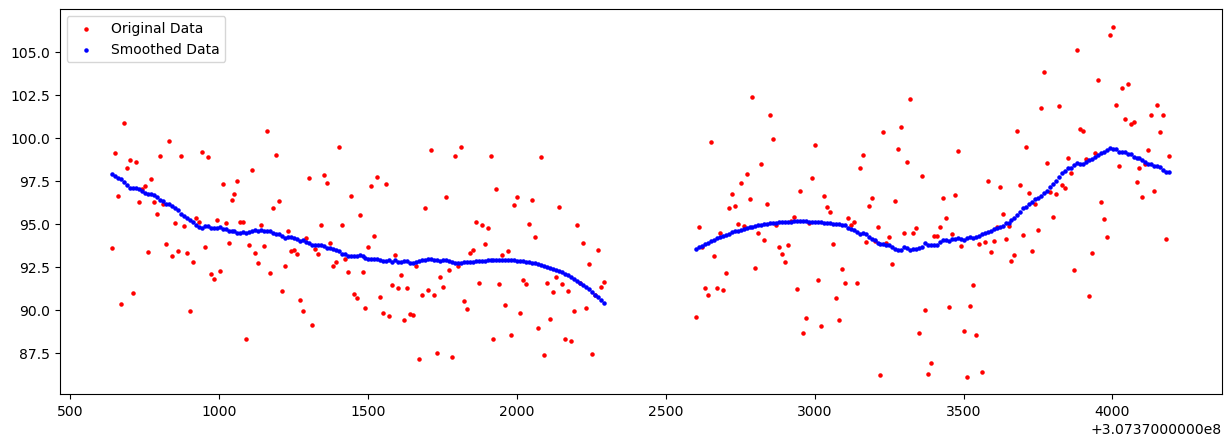

In [11]:
from scipy.signal import savgol_filter
count = 0
for a in a_complete:
    x = a[1].data['TIME']
    y = a[1].data['RATE']
    indices_range1 = np.where((x  <= 2300 + c) &(x>=600 +c))
    indices_range2 = np.where((x  >= 2600 + c)&(x<=4200 +c))
    add = np.concatenate([y[indices_range2],y[indices_range1]])
    range = np.concatenate([x[indices_range2],x[indices_range1]])
    yhat = savgol_filter(add, 101, 3)
    noise = add-yhat
    signal_mean = np.mean(yhat)
    noise_std= np.std(yhat)
    indices_range = np.where((x  >= 2300 + c) & (x  <= 2600 + c))
    y_range = y[indices_range]
    mean = np.mean(y_range)
    snr = (mean/noise_std)
    plt.subplots(1, 1, figsize = (15,5))
    plt.scatter(range,(add), label = 'Original Data',color = 'red', s=5)
    plt.scatter(range,yhat, label = 'Smoothed Data', color = 'blue', s=5)
    plt.legend()
    print("The SNR for quad",count,"is",(snr))
    count+=1

### RMS Method: Take the RMS value of the noise, and divide the peak of the GRB by it.

In [12]:
count = 0
for a in a_complete:
    x = a[1].data['TIME']
    y = a[1].data['RATE']
    indices_range1 = np.where((x  <= 2300 + c) &(x>=600 +c))
    indices_range2 = np.where((x  >= 2500 + c)&(x<=4200 +c))
    add = np.concatenate([y[indices_range2],y[indices_range1]])
    range = np.concatenate([x[indices_range2],x[indices_range1]])
    signal_sq = np.square(add)
    sq_mean= np.mean(signal_sq)
    rms = np.sqrt(sq_mean)
    indices_range = np.where((x  >= 2300 + c) & (x  <= 2500 + c))
    y_range = y[indices_range]
    mean = np.mean(y_range)
    snr = ((np.max(y) - np.mean(add))/rms)
    print("The SNR for quad",count,"is",20*np.log10(snr))
    count+=1

The SNR for quad 0 is 10.72853684425354
The SNR for quad 1 is 9.86451506614685
The SNR for quad 2 is 14.051095247268677
The SNR for quad 3 is 13.149082660675049


### Poisson's Fitting:


In [13]:
from scipy.special import factorial

def poissons(x, lamb):
    return (lamb ** x / factorial(x)) * np.exp(-lamb)

a1 = fits.open('final_output2_Q0.lc')
a2 = fits.open('final_output2_Q1.lc')
a3 = fits.open('final_output2_Q2.lc')
a4 = fits.open('final_output2_Q3.lc')
a_complete = [a1, a2, a3, a4]

for a in a_complete:
    x = a[1].data['TIME']
    y = a[1].data['RATE']
    range1_mask = (x <= 2300 + c) & (x >= 600 + c)
    range2_mask = (x >= 2500 + c) & (x <= 4200 + c)
    indices_range1 = np.where(np.round(range1_mask))[0]  # Convert to integer array
    indices_range2 = np.where(np.round(range2_mask))[0]  # Convert to integer array
    add = np.concatenate([y[indices_range2], y[indices_range1]])
    hist, bins = np.histogram(add, bins=100, density=False)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    popt, pcov = curve_fit(poissons, bin_centers, hist)
    lambda_fit = popt[0]
    curve_x = np.linspace(min(bin_centers), max(bin_centers), 100)
    curve_y = poissons(curve_x, lambda_fit)
    print(popt)


[1.]
[1.]
[1.]
[1.]


c:\Users\yashs\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
